In [26]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism

train_img = glob("D:/MLDatasets/TCGA-GBM Datasets/Training/TCGA-02-0006/TCGA-02-0006_1996.08.23_t1.nii.gz")
train_seg = glob("D:/MLDatasets/TCGA-GBM Datasets/Training/TCGA-02-0006/TCGA-02-0006_1996.08.23_GlistrBoost_ManuallyCorrected.nii.gz")

train_files = [{'vol': train_img, 'seg': train_seg}]

pixdim=(1.0, 1.0, 1.0)

# TEST
a_min=0
a_max=502.0
# TEST

spatial_size=[128,128,154]

train_transforms = Compose(
    [
        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True), 
        CropForegroundd(keys=["vol", "seg"], source_key="vol"),
        Resized(keys=["vol", "seg"], spatial_size=spatial_size),   
        ToTensord(keys=["vol", "seg"]),

    ]
)

train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0)
train_loader = DataLoader(train_ds, batch_size=1)

Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Image shape is: torch.Size([1, 1, 128, 128, 154])
Label shape is: torch.Size([1, 1, 128, 128, 154])


C:\Users\steve\AppData\Local\Temp\ipykernel_11868\756564493.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(40, 100)):


  0%|          | 0/60 [00:00<?, ?it/s]

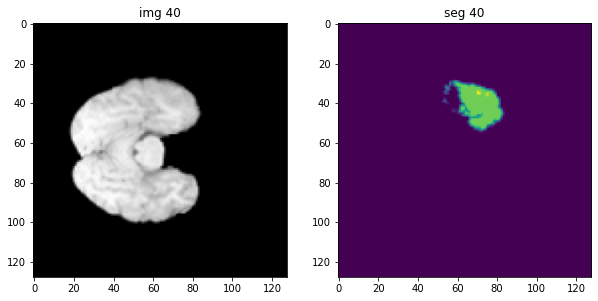

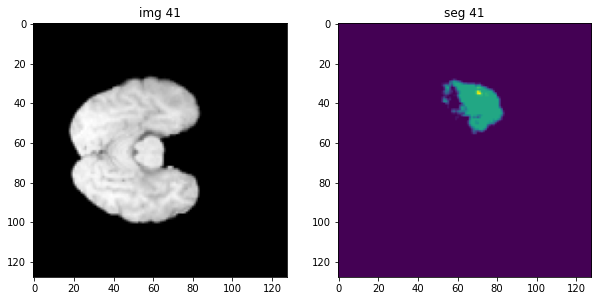

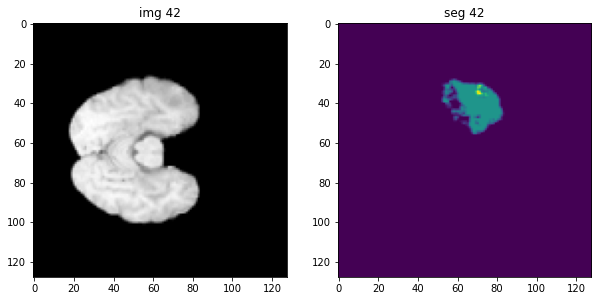

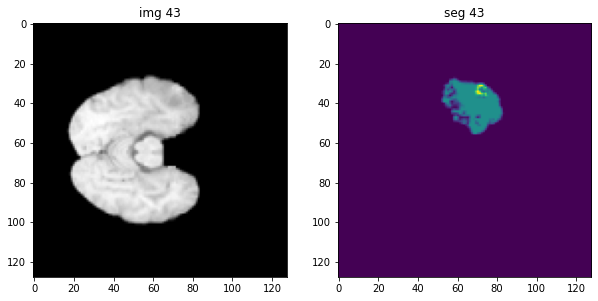

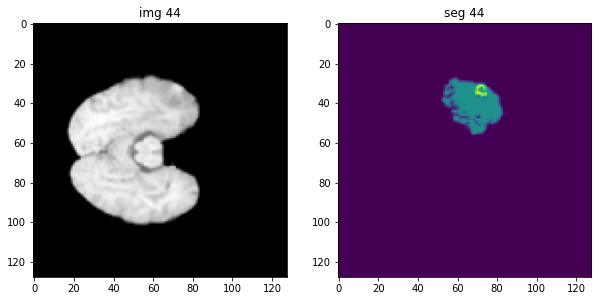

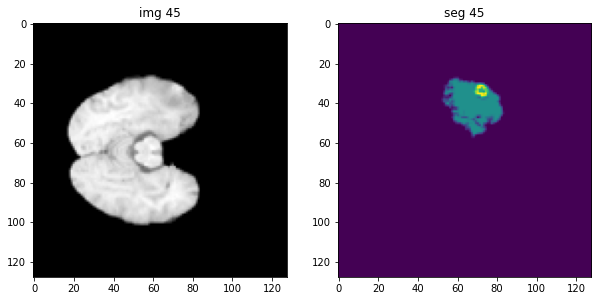

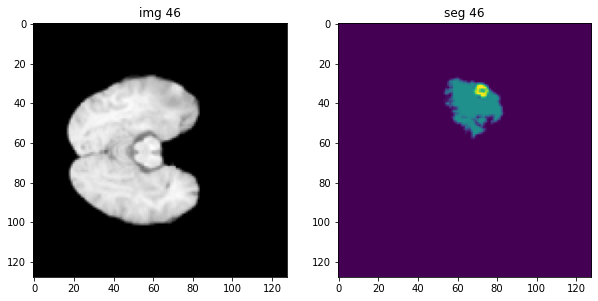

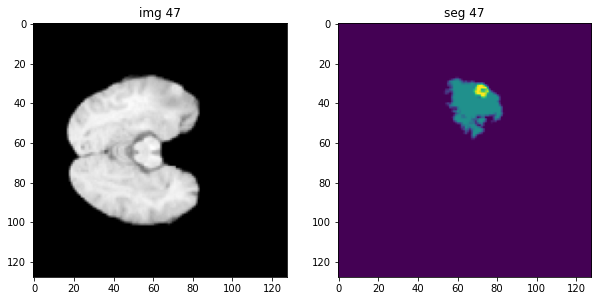

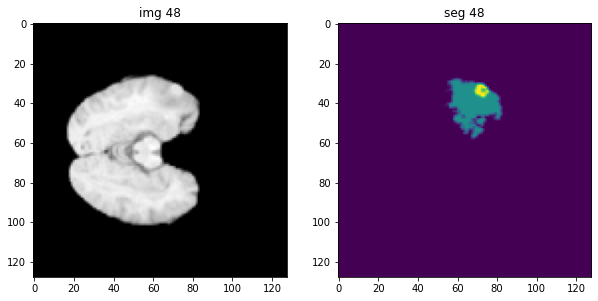

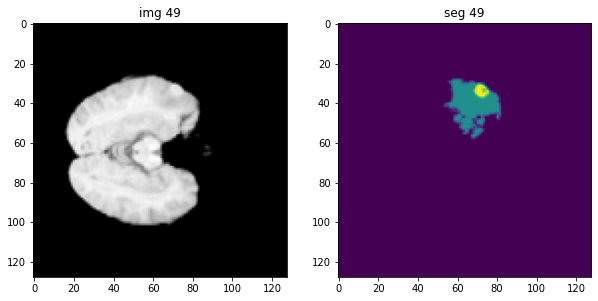

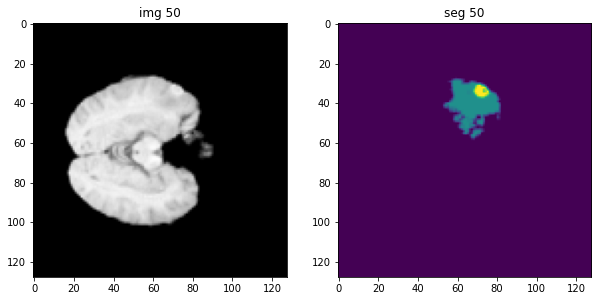

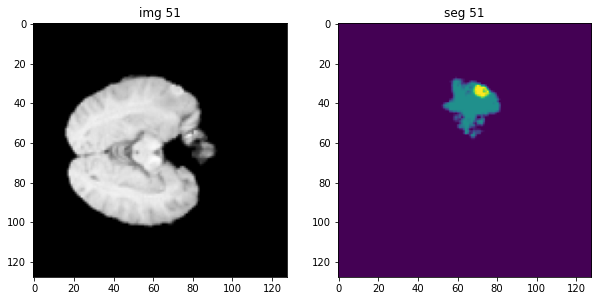

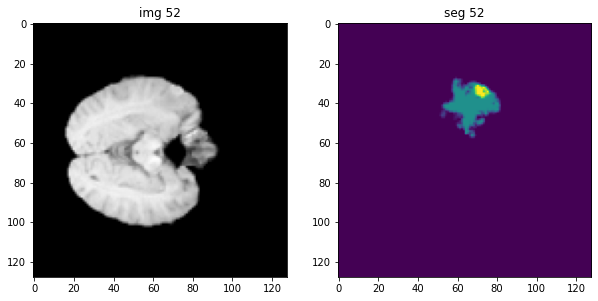

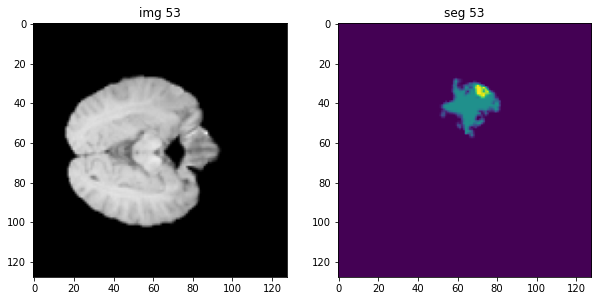

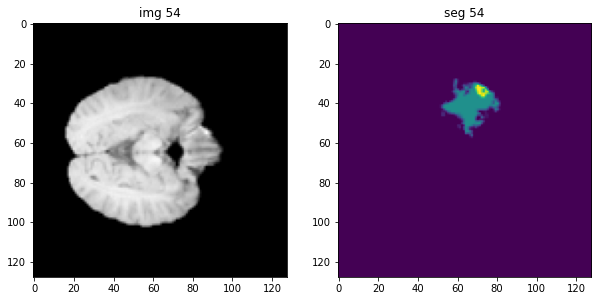

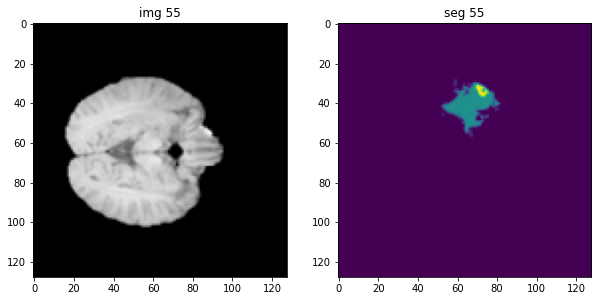

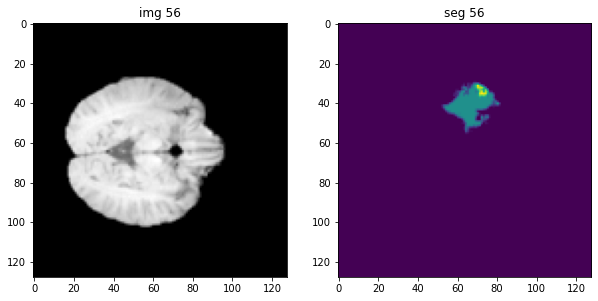

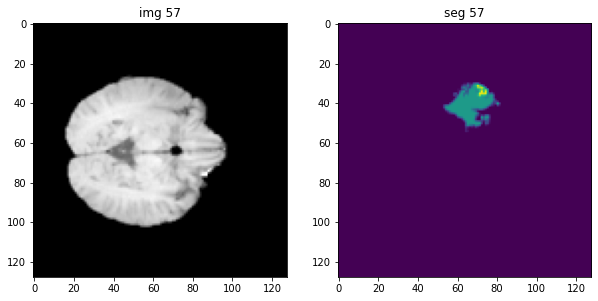

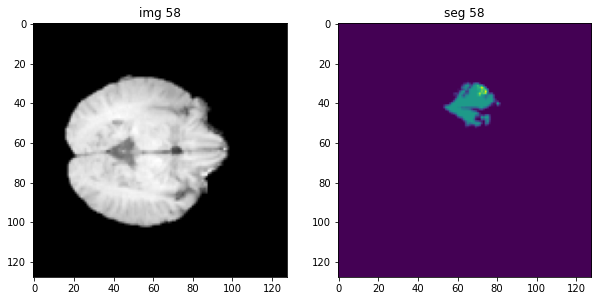

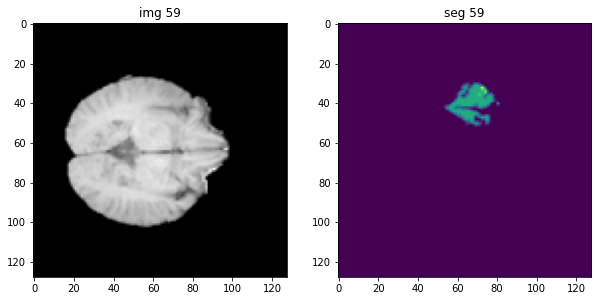

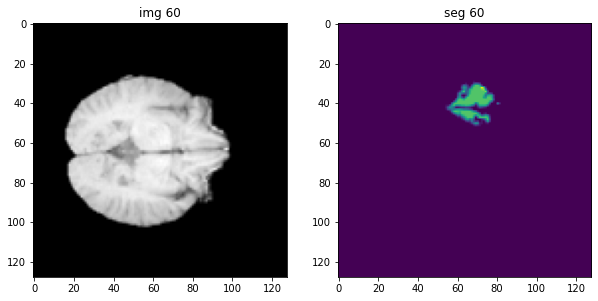

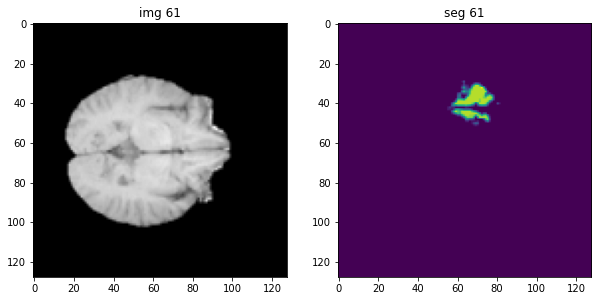

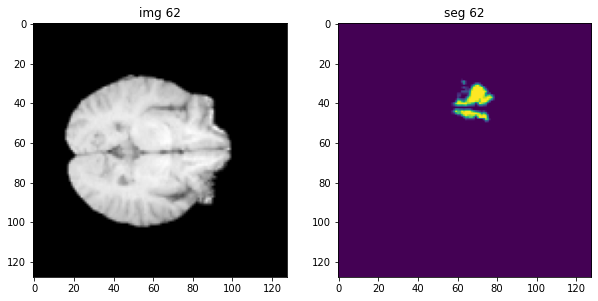

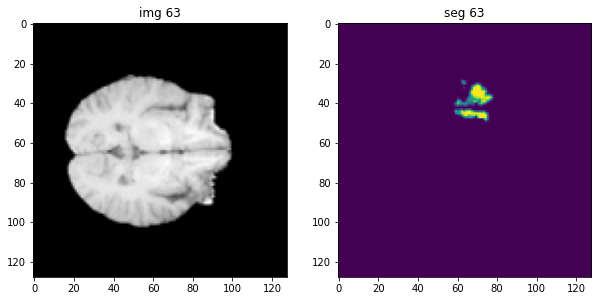

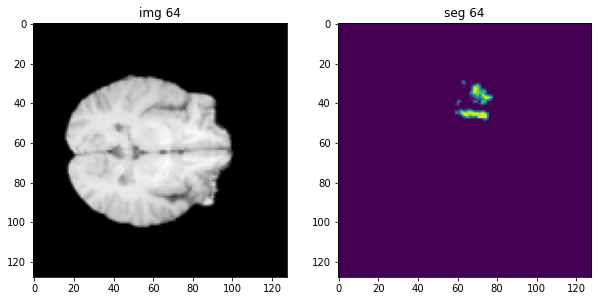

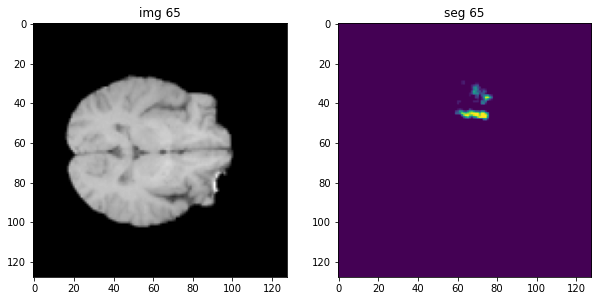

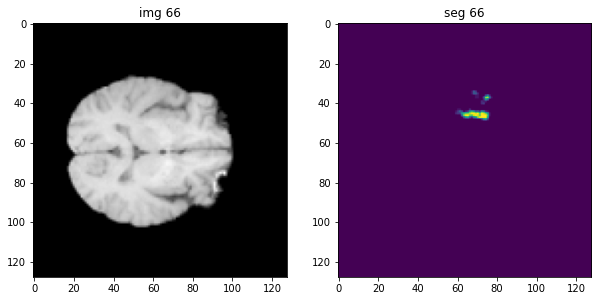

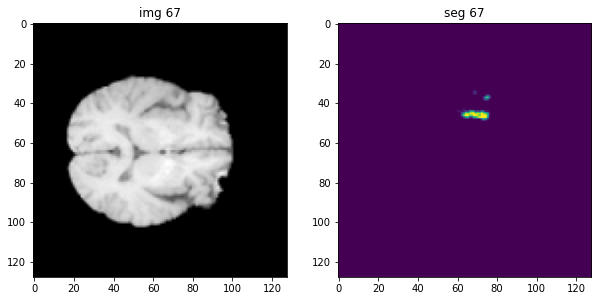

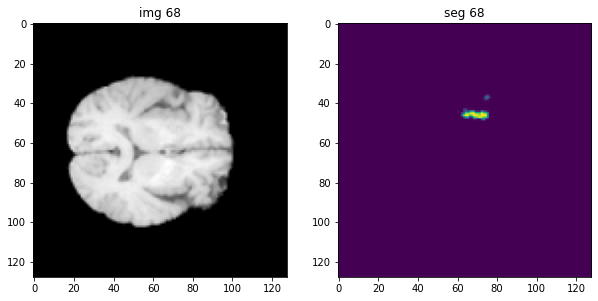

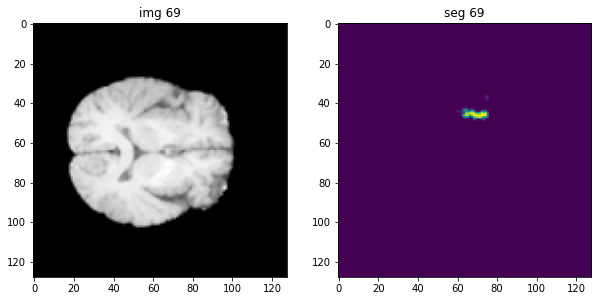

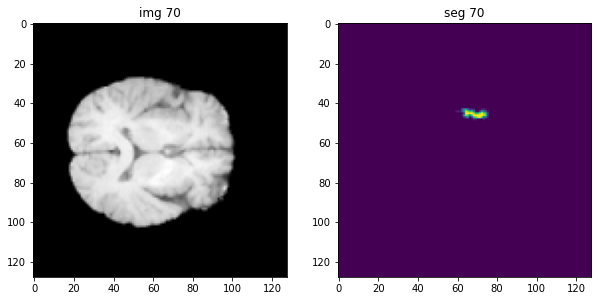

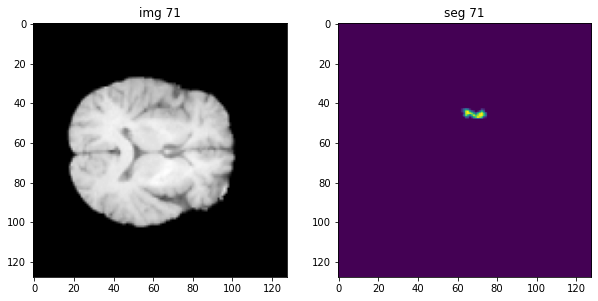

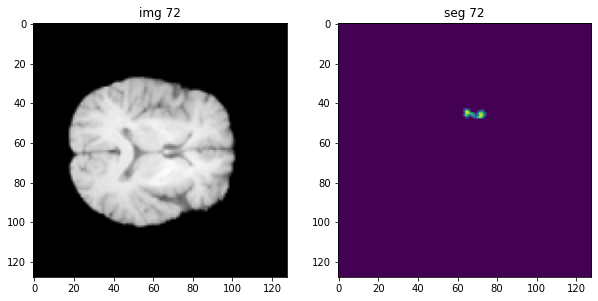

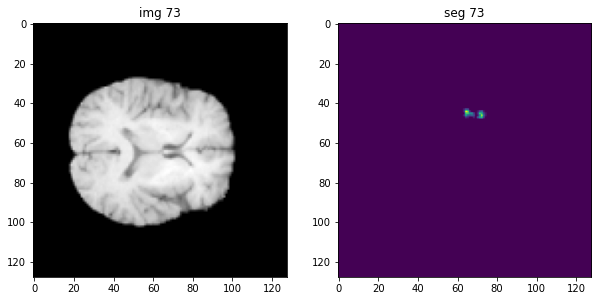

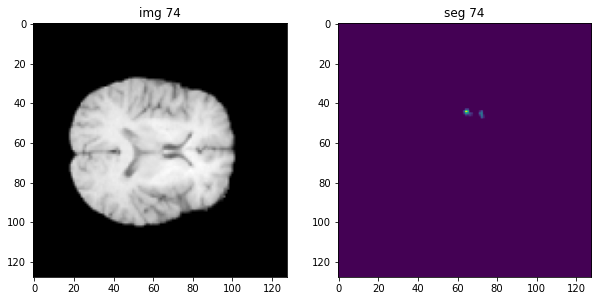

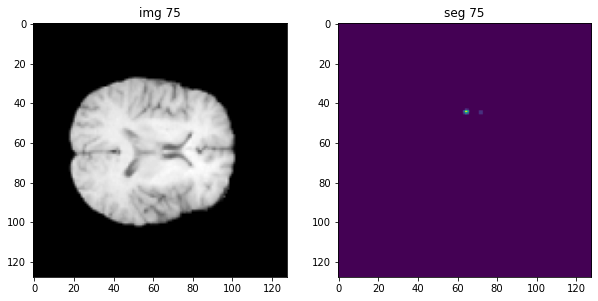

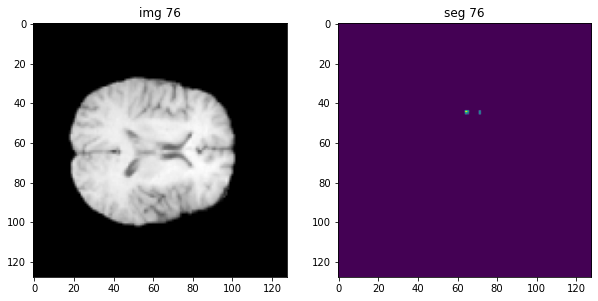

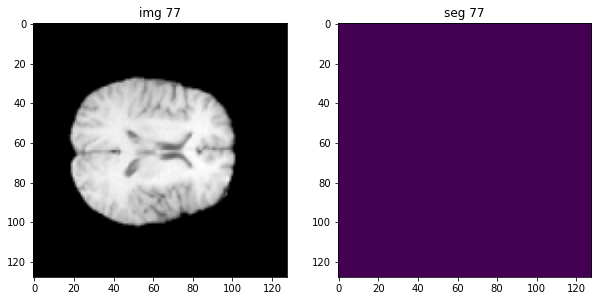

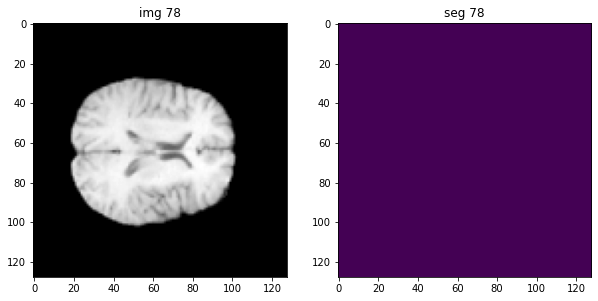

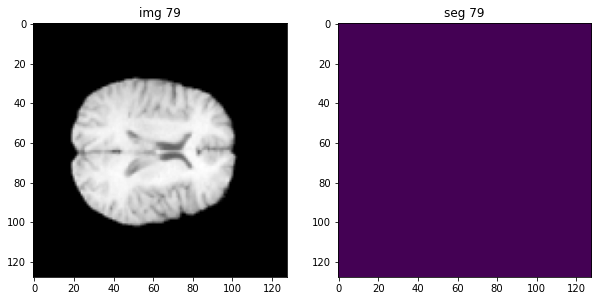

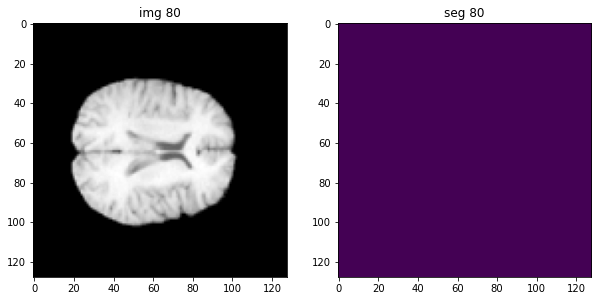

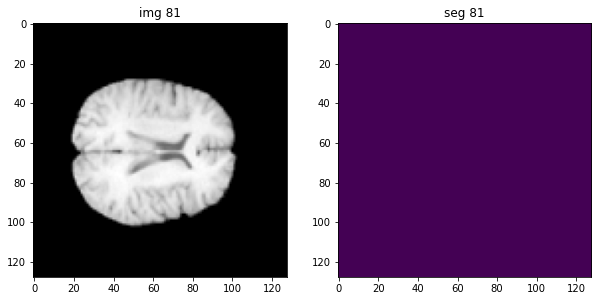

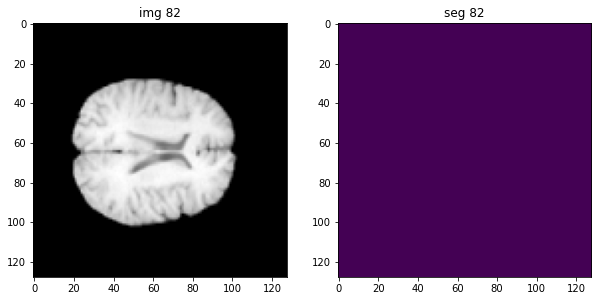

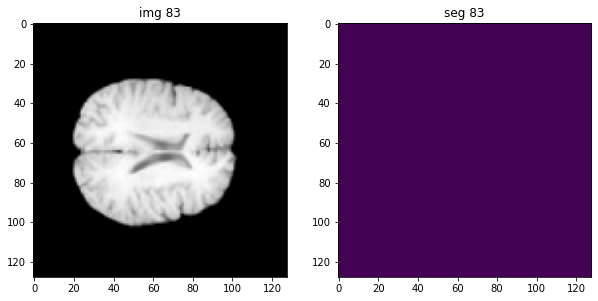

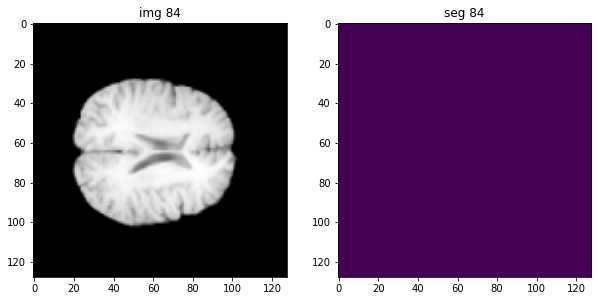

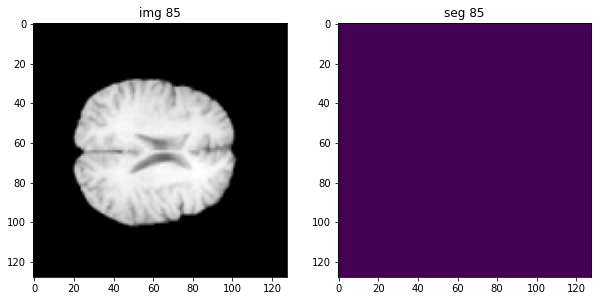

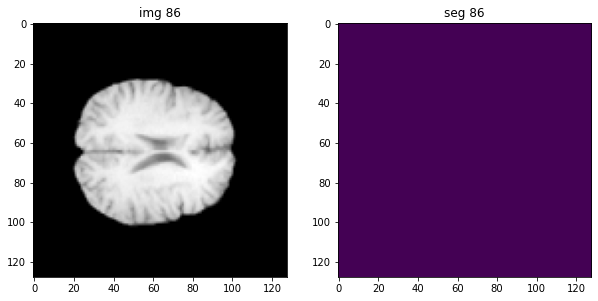

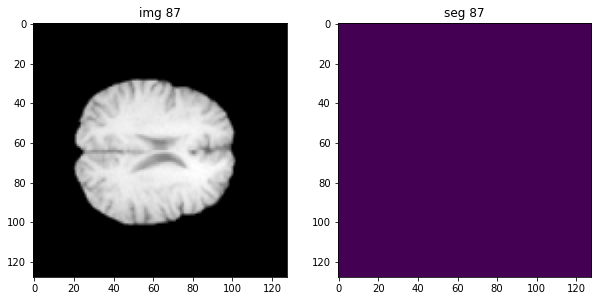

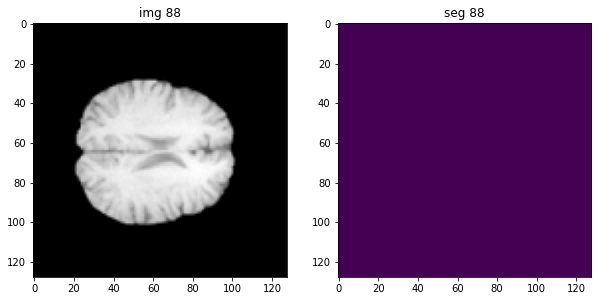

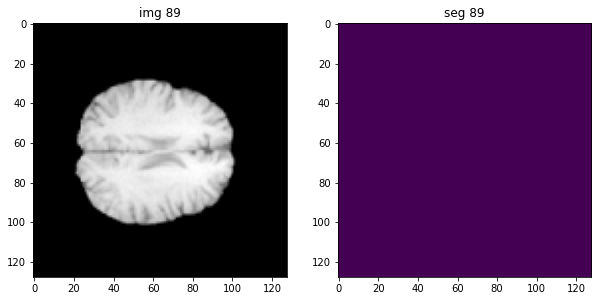

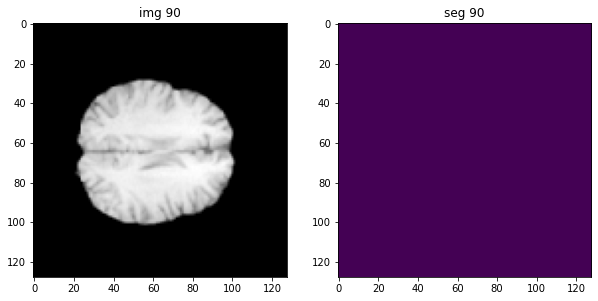

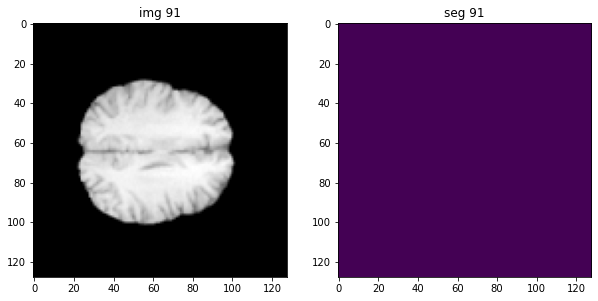

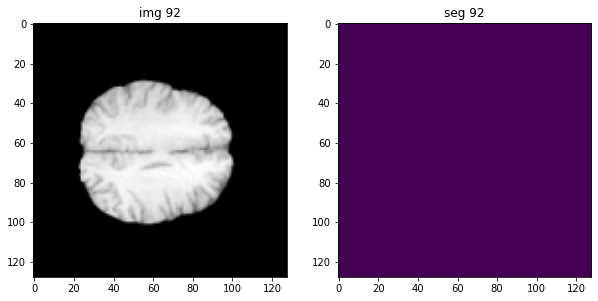

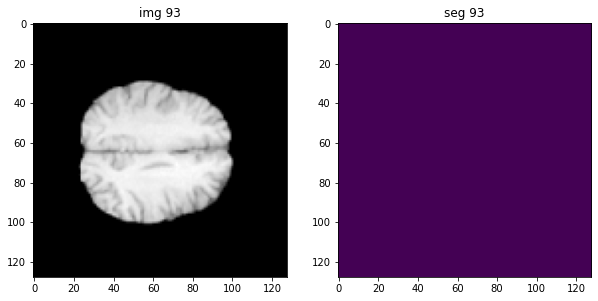

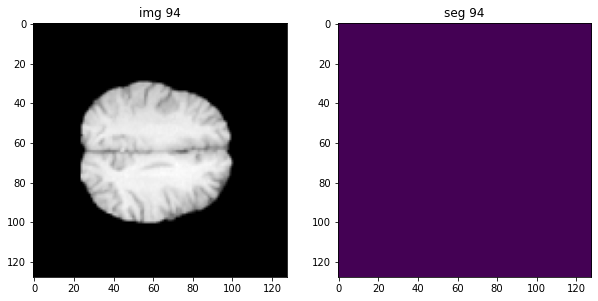

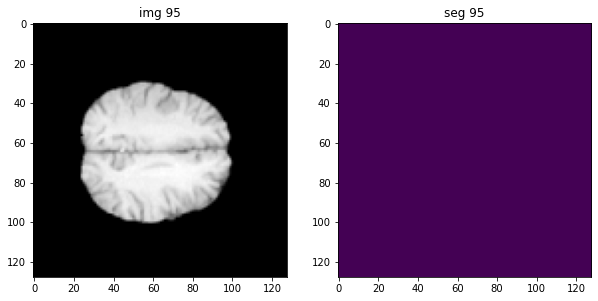

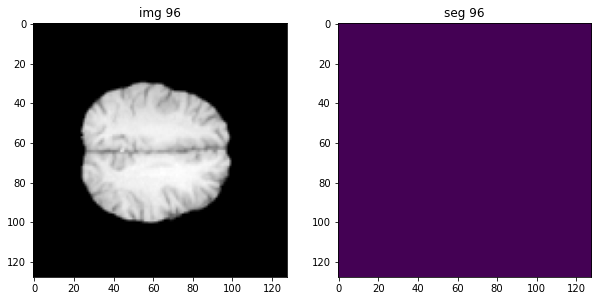

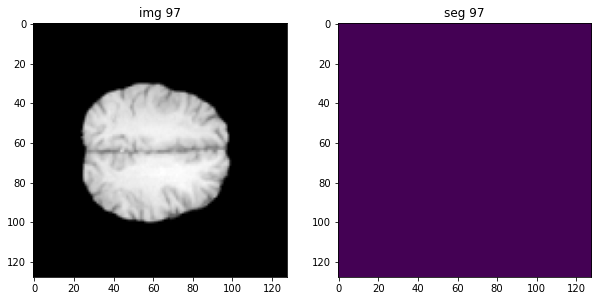

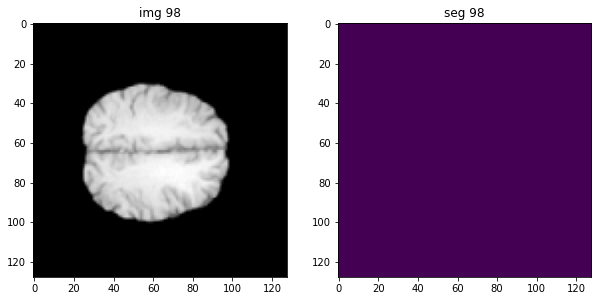

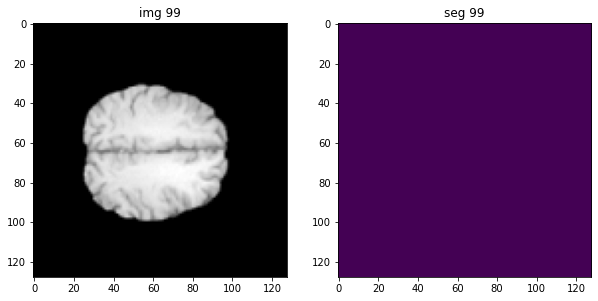

In [27]:
from monai.utils import first
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
firstdata = first(train_loader)
print(f"Image shape is: {firstdata['vol'].shape}")
print(f"Label shape is: {firstdata['seg'].shape}")

for i in tqdm_notebook(range(40, 100)):
    plt.figure("Training NIFTI", (10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"img {i}")
    plt.imshow(firstdata['vol'][0, 0, :, :, i], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title(f"seg {i}")
    plt.imshow(firstdata['seg'][0, 0, :, :, i])
    plt.show()